# Исследования рынка общепита в Москве для принятия решения об открытии нового заведения

## Описание проекта

<b>Цель:</b> исследование рынка общественного питания на основе открытых данных, подготовка презентации для инвесторов <br>
<b>Описание:</b> мною был исследован вопрос - будет ли успешным и популярным на долгое время кафе, в
котором гостей обслуживают роботы-официанты. По результатам анализа подготовлена
презентация для инвесторов с рекомендациями. В построении графиков я использовали
библиотеки seaborn и plotly. 

# Описание данных

Таблица `rest_data`:

- `id` — идентификатор объекта;
- `object_name` — название объекта общественного питания;
- `chain` — сетевой ресторан;
- `object_type` — тип объекта общественного питания;
- `address` — адрес;
- `number` — количество посадочных мест.

## Шаг №1. Загрузка данных и подготовка их к анализу

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import requests
from bs4 import BeautifulSoup
from itertools import zip_longest


server_path = '/datasets/rest_data.csv'   
local_path= 'datasets/rest_data.csv'              

try:
    df = pd.read_csv(server_path)    
except: 
    df = pd.read_csv(local_path)

    
pd.options.display.float_format = '{:,.2f}'.format

### Проверка типов данных столбцов 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [3]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [4]:
df[df['address'].str.contains("Зеленоград")]

,id,object_name,chain,object_type,address,number
1386,22331,СТОЛОВАЯ МИЭТ,нет,столовая,"город Москва, город Зеленоград, улица Юности, ...",56
1405,20199,ЭТО,нет,кафе,"город Москва, город Зеленоград, корпус 401",35
1406,68113,Френдс,нет,кафе,"город Москва, город Зеленоград, корпус 435",34
1407,20105,Кафе «Граф Монте-Кристо»,нет,кафе,"город Москва, город Зеленоград, корпус 436",40
1408,22982,Альфорно,нет,кафе,"город Москва, город Зеленоград, корпус 438",49
...,...,...,...,...,...,...
14478,211676,Никольский,нет,ресторан,"город Москва, город Зеленоград, корпус 532",120
14479,220992,Dolce crema,нет,предприятие быстрого обслуживания,"город Москва, город Зеленоград, Панфиловский п...",0
15137,209920,Дюшес,да,ресторан,"город Москва, город Зеленоград, Проезд № 4806,...",100
15183,205739,Пицца Паоло и Бенто WOK,да,кафе,"город Москва, город Зеленоград, Панфиловский п...",30


### Поиск дубликатов 

Найдем явные дубликаты

In [5]:
print('кол-во явных дубликатов:', df.duplicated().sum())

кол-во явных дубликатов: 0


In [6]:
print('кол-во дубликатов в id:', df['id'].duplicated().sum())
print('кол-во дубликатов в object_name:', df['object_name'].duplicated().sum())
print('кол-во дубликатов в address:', df['address'].duplicated().sum())


кол-во дубликатов в id: 0
кол-во дубликатов в object_name: 4973
кол-во дубликатов в address: 6258


Приведем столбец с названиями ресторанав к одному регистру.

In [7]:
df['object_name'] = df['object_name'].str.lower()

Так же удалим знаки препинания

In [8]:
df['object_name'] = df['object_name'].str.replace(r'[^\w\s]+', '', regex=True)
df.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе академия,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе вишневая метель,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [9]:
print('кол-во явных дубликатов:', df.duplicated().sum())

кол-во явных дубликатов: 0


Проверим на дубликаты по двум столбцам

In [10]:
df.duplicated(subset=['object_name','address']).sum()

228

Как видим есть дубликаты по названию и адрессу. Удалим данные дубликаты

In [11]:
df = df.drop_duplicates(subset=['object_name','address'])
df.duplicated(subset=['object_name','address']).sum()

0

Найдем пропуски по всем столбцам:

In [12]:
df.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

Проверим категориальные столбцы chain и object_type на уникальные значения в этих столбцах.

In [13]:
df['chain'].unique()

array(['нет', 'да'], dtype=object)

In [14]:
df['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

### Вывод: 

как видно в таблице все столбцы соответвуют правильным типам данных. В таблице отсутвуют полные дубликаты, а так же пропуски. Были проанализированны столбцы на дубликаты. В названиях и адресе могут встречаться дубли т.к. есть заведения с одинаковыми названиями, а так же есть заведения располагающиеся по одному адресу. Были найденны дубли по двум столбца: название и адресс, данные дубли были удалены.

## Шаг №2. Анализ данных

### Вопрос 1 

Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.

<AxesSubplot:ylabel='object_type'>

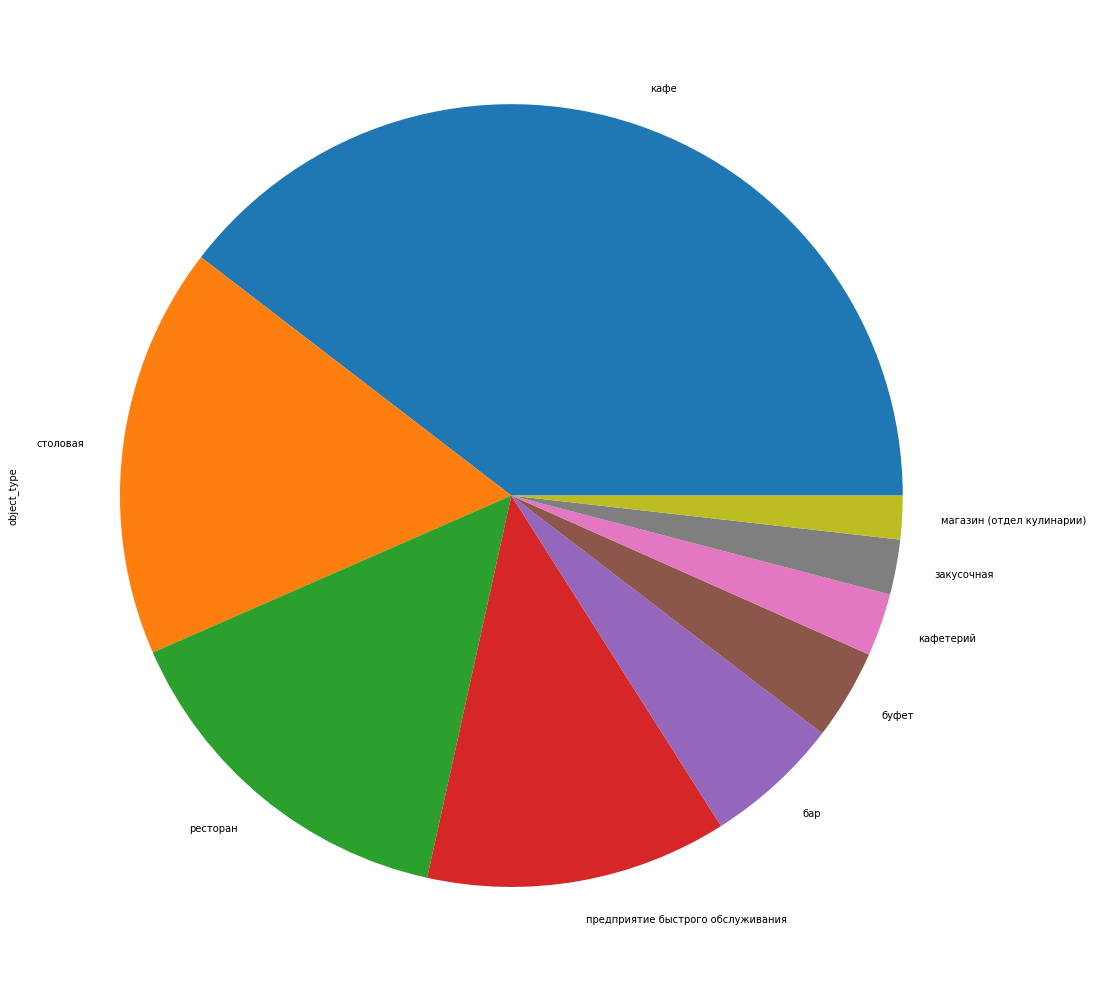

In [15]:
df.groupby('object_type')['object_type'].count().sort_values(ascending=False).plot(kind='pie', figsize=(20,18))

Вывод: как видно из полученных данных большую часть рынка общственного питания занимают кафе. На втором, третьем и четвертом месте расположились Столовые, Рестораны и Предприятия общественного пистания. Все остальные типы заведений занимают значительно меньшую долю рынка.

### Вопрос 2 

Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.

In [16]:
chain_restaurants = df[df['chain'] == 'да']


unchain_restaurants = df[df['chain'] == 'нет']


print('Получилось сетевых заведений:', chain_restaurants['chain'].count())
print('Получилось не сетевых заведений:', unchain_restaurants['chain'].count())
print('Соотношение сетевых/ не сетевых ресторанов:', chain_restaurants['chain'].count() / unchain_restaurants['chain'].count())

Получилось сетевых заведений: 2936
Получилось не сетевых заведений: 12202
Соотношение сетевых/ не сетевых ресторанов: 0.24061629241108015


<AxesSubplot:xlabel='chain'>

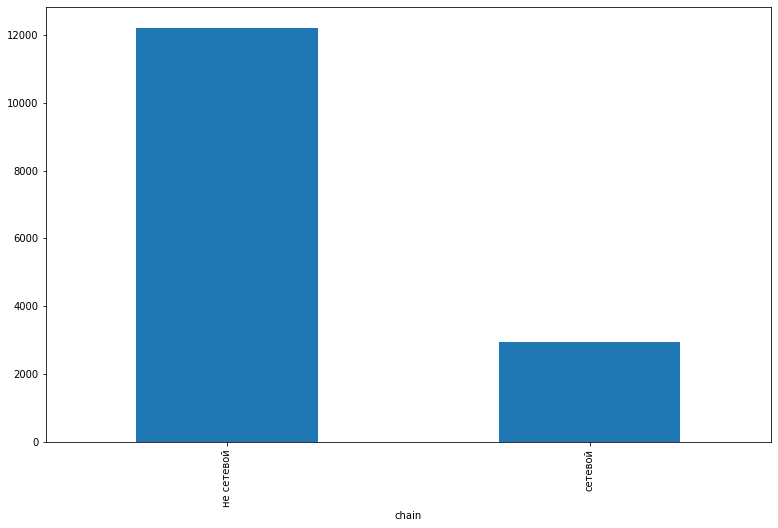

In [17]:
df['chain'] = df['chain'].str.replace('да', 'сетевой', regex=True)
df['chain'] = df['chain'].str.replace('нет', 'не сетевой', regex=True)
df.groupby('chain')['chain'].count().sort_values(ascending=False).plot(kind='bar', figsize=(13,8))

Вывод: как видно из полученных данных не сетевых заведений общественного питания больше практически на 76%, чем сетевых.

### Вопрос 3 

Для какого вида объекта общественного питания характерно сетевое распространение?

In [18]:
#chain_restaurants.groupby('object_type')['object_name'].count().sort_values(ascending=True)
chain_restaurants1 = chain_restaurants
chain_restaurants = chain_restaurants.groupby('object_type')['object_name'].count().reset_index()
unchain_restaurants = df.groupby('object_type')['object_name'].count().reset_index()
chain_restaurants.rename( columns={'object_name':'count chain'}, inplace=True )
unchain_restaurants.rename( columns={'object_name':'uncount chain'}, inplace=True )
chain_restaurants = chain_restaurants.merge(unchain_restaurants, how='left')
chain_restaurants

,object_type,count chain,uncount chain
0,бар,37,849
1,буфет,9,565
2,закусочная,56,344
3,кафе,1382,5991
4,кафетерий,51,392
5,магазин (отдел кулинарии),78,272
6,предприятие быстрого обслуживания,782,1885
7,ресторан,538,2268
8,столовая,3,2572


In [19]:
chain_restaurants['fraction'] = chain_restaurants['count chain'] / chain_restaurants['uncount chain']
chain_restaurants.sort_values(by='fraction', ascending=False)

,object_type,count chain,uncount chain,fraction
6,предприятие быстрого обслуживания,782,1885,0.41
5,магазин (отдел кулинарии),78,272,0.29
7,ресторан,538,2268,0.24
3,кафе,1382,5991,0.23
2,закусочная,56,344,0.16
4,кафетерий,51,392,0.13
0,бар,37,849,0.04
1,буфет,9,565,0.02
8,столовая,3,2572,0.00


Вывод: как видно из полученных данных для предприятия быстрого обслуживания характерно сетевое распространение.

### Вопрос 4 

Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

       count   mean
count 246.00 246.00
mean   10.70  59.28
std    22.28  50.16
min     2.00   0.00
25%     2.00  20.54
50%     4.00  43.50
75%     7.75  85.00
max   154.00 258.67
AxesSubplot(0.125,0.125;0.775x0.755)


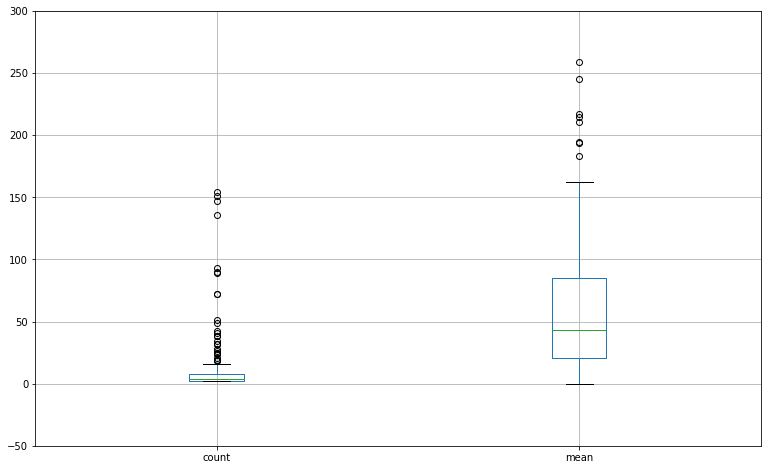

In [20]:
agg_func_math = {
    'object_name': ['count'],
    'number' : ['mean']
}
dfs1 = chain_restaurants1.groupby('object_name', as_index=True).agg(agg_func_math).reset_index(drop=True)

#dfs1 = dfs1.apply(lambda x: x[x.index(level=1)["count"] > 1])
dfs1.columns = [tup[1] if tup[1] else tup[0] for tup in dfs1.columns]
dfs1 = dfs1[dfs1['count'] > 1]


print(dfs1.describe())

dfs_plot = dfs1.boxplot(figsize=(13,8))
import matplotlib.pyplot as plt

plt.ylim(-50, 300)
print(dfs_plot)

In [21]:
print('По кол-ву заведений в сети')
object_name_gr1 = dfs1[(dfs1['count'] > 1) & (dfs1['count'] < 51)]
object_name_gr2 = dfs1[(dfs1['count'] > 50) & (dfs1['count'] < 100)]
object_name_gr3 = dfs1[(dfs1['count'] > 99) & (dfs1['count'] < 170)]
print('заведений в 1 группе:', object_name_gr1['count'].count())
print('заведений в 2 группе:', object_name_gr2['count'].count())
print('заведений в 3 группе:', object_name_gr3['count'].count())

print('По кол-ву посадочных мест')
object_name_gr1 = dfs1[(dfs1['mean'] > 0) & (dfs1['mean'] < 51)]
object_name_gr2 = dfs1[(dfs1['mean'] > 50) & (dfs1['mean'] < 100)]
object_name_gr3 = dfs1[(dfs1['mean'] > 100) & (dfs1['mean'] < 400)]
print('заведений в 1 группе:', object_name_gr1['mean'].count())
print('заведений в 2 группе:', object_name_gr2['mean'].count())
print('заведений в 3 группе:', object_name_gr3['mean'].count())

По кол-ву заведений в сети
заведений в 1 группе: 236
заведений в 2 группе: 6
заведений в 3 группе: 4
По кол-ву посадочных мест
заведений в 1 группе: 134
заведений в 2 группе: 57
заведений в 3 группе: 49


In [22]:
# Код ревьюера

(pd.qcut(dfs1['count'], q=3, labels=['мало заведений', 'среднее число заведений', 'много заведений']).astype('str') + 
    '\\' +
pd.qcut(dfs1['mean'], q=3, labels=['мало мест', 'среднее число мест', 'много мест']).astype('str')).value_counts()

мало заведений\много мест                     44
мало заведений\мало мест                      41
мало заведений\среднее число мест             35
много заведений\среднее число мест            27
много заведений\мало мест                     23
много заведений\много мест                    22
среднее число заведений\среднее число мест    20
среднее число заведений\мало мест             18
среднее число заведений\много мест            16
dtype: int64

In [23]:
print('Наткнуться на сеть с большим числом посадочных мест и небольшим числом заведений в сети:')
print(44/246)
print('Наткнуться на сеть с небольшим числом посадочных мест и большим числом заведений в сети:')
print(23/246)
print('Наткнуться на сеть с небольшим числом посадочных мест и небольшим числом заведений в сети:')
print(41/246)
print('Наткнуться на сеть с большим числом посадочных мест и большим числом заведений в сети:')
print(22/246)

Наткнуться на сеть с большим числом посадочных мест и небольшим числом заведений в сети:
0.17886178861788618
Наткнуться на сеть с небольшим числом посадочных мест и большим числом заведений в сети:
0.09349593495934959
Наткнуться на сеть с небольшим числом посадочных мест и небольшим числом заведений в сети:
0.16666666666666666
Наткнуться на сеть с большим числом посадочных мест и большим числом заведений в сети:
0.08943089430894309


Вывод: из полученных данных видно что для сетевых заведений характерно: мало заведений с большим количеством посадочных мест. Так же стоить отметить что так же характерно для сетевых заведений: сети с небольшим кол-в посадочных мест и небольшим числом заведений в сети.

### Вопрос 5 

Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

In [24]:
chain_restaurants1.groupby('object_type')['number'].mean().sort_values(ascending=False)

object_type
столовая                            112.33
ресторан                            100.81
бар                                  53.03
кафе                                 47.54
предприятие быстрого обслуживания    40.21
закусочная                           14.38
кафетерий                            12.51
магазин (отдел кулинарии)             8.68
буфет                                 7.78
Name: number, dtype: float64

<AxesSubplot:ylabel='object_type'>

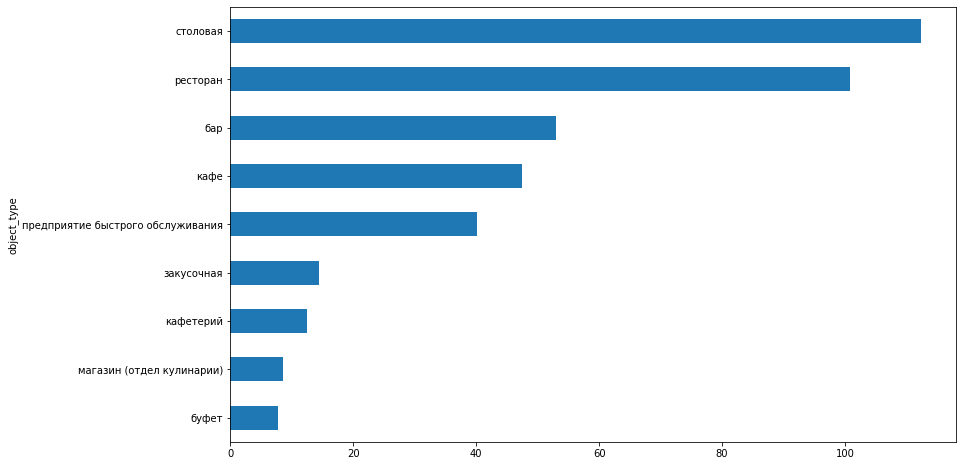

In [25]:
chain_restaurants1.groupby('object_type')['number'].mean().sort_values(ascending=True).plot(kind='barh', figsize=(13,8))

Вывод: как видно из полученных данных в среднем самое большое ко-во посадочных мест находятся в столовых (в среднем 112 мест).

### Вопрос 6 

Выделите в отдельный столбец информацию об улице из столбца address .

In [26]:
def street(st):
    m = st.split(',')
    if 'город' in m[1]:
        return m[1].replace('город', '').strip('\"').strip("\'")
    if 'поселение' in m[1]:
        return m[1].replace('поселение', '').strip('\"').strip("\'")
    else:
        t = ''
        ms = m[1].split(' ')
        for i in ms:
            if len(i) != 0:
                if i[0].isupper():
                    t += i + ' '
        return t
df['street'] = df['address'].apply(street)
df.head()

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,не сетевой,кафе,"город Москва, улица Егора Абакумова, дом 9",48,Егора Абакумова
1,77874,родник,не сетевой,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,Талалихина
2,24309,кафе академия,не сетевой,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская
3,21894,пиццетория,сетевой,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская
4,119365,кафе вишневая метель,не сетевой,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская


### Вопрос 7 

Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

Для того чтобы найти районы, воспользуемся внешней информацией с сайта: http://округа-районы.москва/ . Информацию с данного сайта спарсим. При парсинге будем учитывать тип улицы (бульвар, проспект, шоссе и т.д.). Полученные данные сохраним в столбец "район".

In [4]:
# Код ревьюера
from functools import partial
import time
import re
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="my_fancy_application")

direct = partial(geolocator.geocode, language="ru")
reverse = partial(geolocator.reverse, language="ru")

def get_lat_lng_district(row, direct, reverse):
    
    time.sleep(1)
    street = row['street']
    try:
        house = re.search(', дом (\d+)',row['address']).group(1)
    except:
        house = ""
    location = direct({'city' : 'Москва', 'street' : f"{street} {house}"})
    
    
    if location is None:
        return [None, None, None]
    lat = location.latitude
    lng = location.longitude
    
    time.sleep(1)
    
    try:
        district = reverse(f"{lat}, {lng}").raw['address']['suburb']
    except KeyError:
        district = None
    
    return [lat,lng,district]

In [6]:
# Код ревьюера

s_1 = pd.Series(['город Москва, улица Егора Абакумова, дом 9','улица Егора Абакумова'], index=['address','street'])
get_lat_lng_district(s_1, direct, reverse)

[55.87899365, 37.7145931801882, 'Ярославский район']

In [27]:
!pip install lxml
!pip install requests
!pip install beautifulsoup4
!pip install selectolax

     |████████████████████████████████| 5.0 MB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 43.6 MB/s eta 0:00:01


In [28]:
import requests, json, re
from bs4 import BeautifulSoup
from selectolax.parser import HTMLParser
k = 0
t3 = '[  '
def pars_street(street):
    global k, t3
    print(t3, end='')
    t = street['address']
    txt = street['street'].rstrip().lstrip()  
    url = 'http://xn----7sbbj7ab0abgod6a9h.xn--80adxhks/все_улицы_москвы?AddrobjectSearch%5Boffname%5D=' + txt

    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    data = []
    table = soup.find('table', attrs={'class':'table table-striped table-bordered'})
    table_body = table.find('tbody')
    rows = table_body.find_all('tr')
    for row in rows:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        data.append([ele for ele in cols if ele])
    if len(data) != 0:
        k += 1
        yes = 0
        for h in list(range(0, 15536, 153)):
            if k == h:
                yes = 1
        if k == 1:
            t3 = '#'
            print(t3, end='')
        elif yes == 1:
            t3 = '#'
            print(t3, end='')
        if len(data) != 0:
            for j in data:
                if len(j) > 1 and j[1].replace('ул', 'улица').replace('пр-кт', 'проспект').replace('ш', 'шоссе').replace('пер', 'переулок').replace('наб', 'набережная').replace('пер', 'переулок') in t:
                     return j[-1]
                elif len(j) > 1 and  j[2].replace('ул', 'улица').replace('пр-кт', 'проспект').replace('ш', 'шоссе').replace('пер', 'переулок').replace('наб', 'набережная').replace('пер', 'переулок') in t:
                    return j[-1]
            return data[0][-1]

df['район'] = df.apply(pars_street, axis=1) 
print('  ] ok', 'найдено:', k, end='')
df.to_csv('street_msk.csv')

[  #####################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

Проверим кол-во пропусков.

In [29]:
df['район'].isna().sum()

0

Так как сайт выдает сообщение: 'Ничего не найдено.' в случае отсутвия информации. Проверим для скольки улиц не найленны районы.

In [30]:
df[df['район'] == 'Ничего не найдено.']['район'].count()

222

Как видим для 222 улиц не найленны районы. Для данных улиц попробуем найти информацию из внешнего источника google карт. У данного источника есть существенный минус, он дает пропарсить небольшое кол-во улиц в пределах МКАД и потом ставит блок на несколько часов. Появившиеся снеговики в консоли - это и есть районы в пределах МКАД. Поэтому данный источник и принято решение использовать для небольшого оставшигося кол-ва улиц.

In [32]:
import requests, json, re
from bs4 import BeautifulSoup
from selectolax.parser import HTMLParser
k = 0
def pars_street(street):
    global k
    txt = street['address']
    
    if street['район'] == 'Ничего не найдено.':

        if 'город Москва' in txt:
            url = 'https://www.google.ru/maps/place/' + txt
        else:
            url = 'https://www.google.ru/maps/place/' + 'город Москва,' + txt
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        #html = response.text
        #print(soup)
        #tree = HTMLParser(html)
        #sc = tree.css_first('script[nonce="vyt4siSU-7py2VFsXGLlgw"]')
        #sc = soup.find(nonce="vyt4siSU-7py2VFsXGLlgw")
        #print(len(soup.select("script")))
        #sc = json.loads(re.findall(r"<script nonce=\'.*\' >(.*?)</script>",str(soup.select("script")[12]), re.DOTALL)[-1])
        #soup = soup.split('>')
        rez = []

        for i in soup:
            t = str(i).split('>')
            for j in t:
                result = re.sub(r'[^А-я-]', ' ', j)

                if 'р-н' in result or 'район' in result:
                    regex = r"\s((\s)(\s+)?)?"
                    subst = "\\2"
                    result = re.sub(regex, subst, result)
                    rez.append(result.replace(' - ', ''))

        if len(rez) != 0:
            for i in rez:
                if 'р-н' in i or 'район' in i:

                    if len(i) != 0 and i != ' ':

                        txt = i.lstrip().rstrip()


            rez = txt.split()

            for i in rez:
                if 'р-н' in i or 'район' in i:
                    k += 1
                    print('☃', end='')
                    return i.capitalize().replace('р-н', ' район').replace('район',' район')
        else:
            k += 1
            print('*', end='')
            return txt.split(',')[1].lstrip().rstrip()
    return street['район']
df['район'] = df.apply(pars_street, axis=1) 
print('ok', 'найдено:', k)

☃☃☃☃*☃*****☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃*☃**☃☃*☃☃☃*******************☃*☃☃☃***☃☃☃☃☃☃*☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃☃******☃☃**************************☃☃**☃****☃****☃☃*☃☃*☃*☃☃**☃☃☃☃*☃☃☃☃☃☃☃********************************************************ok найдено: 222


In [33]:
df[df['район'] == 'Ничего не найдено.']['район'].count()

0

Как видим для всех улиц районы найденны

In [34]:
df.head(10)

,id,object_name,chain,object_type,address,number,street,район
0,151635,сметана,не сетевой,кафе,"город Москва, улица Егора Абакумова, дом 9",48,Егора Абакумова,Ярославский район
1,77874,родник,не сетевой,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,Талалихина,Таганский район
2,24309,кафе академия,не сетевой,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская,Таганский район
3,21894,пиццетория,сетевой,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская,район Лианозово
4,119365,кафе вишневая метель,не сетевой,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская,район Лианозово
5,27429,стол при гоу сош 1051,не сетевой,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240,Абрамцевская,район Лианозово
6,148815,брусника,сетевой,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,Сивцев Вражек,район Хамовники
7,20957,буфет мтуси,не сетевой,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90,Авиамоторная,район Лефортово
8,20958,кпф семья1,не сетевой,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150,Авиамоторная,район Лефортово
9,28858,столовая мтуси,не сетевой,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120,Авиамоторная,район Лефортово


In [35]:
street = df.groupby(['street', 'район'], as_index=True)['object_name'].count().reset_index().sort_values(by='object_name', ascending=False)
street.head(10)

,street,район,object_name
10,Зеленоград,район Филевский парк,230
947,Мира,Алексеевский район,196
1273,Профсоюзная,Рязановское поселение,179
782,Ленинградский,Хорошевский район,169
1255,Пресненская,Пресненский район,164
307,Варшавское,район Чертаново Центральное,159
787,Ленинский,Ломоносовский район,147
22,Сосенское,Сосенское поселение,136
17,Московский,Сосенское поселение,131
323,Вернадского,Ломоносовский район,126


<AxesSubplot:xlabel='object_name', ylabel='street'>

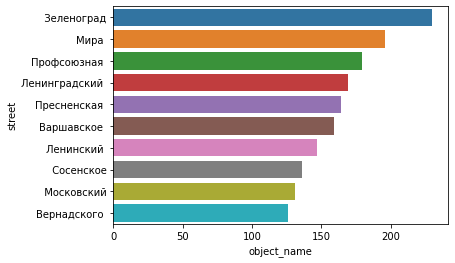

In [36]:
ds = street.iloc[0:10]
sns.barplot(y='street', x='object_name', data=ds) 

In [37]:
top10 = ds['район'].unique(), 
print('Кол-во районов: ', len(ds['район'].unique()))
print('Районы: ', top10)

Кол-во районов:  8
Районы:  (array(['район Филевский парк', 'Алексеевский район',
       'Рязановское поселение', 'Хорошевский район', 'Пресненский район',
       'район Чертаново Центральное', 'Ломоносовский район',
       'Сосенское поселение'], dtype=object),)


Вывод: как видно из полученных данных топ-10 улиц с объектами общественного питания располагаются в 8-ми районах Москвы. Стоит отметить что Филевский парк (проверено вручную, в бд, к нему отнесены улицы г.Зеленоград) поэтому на карте в презентации отмечен как Зеленоград, Рязановское поселение и Сосенское поселение находяться за МКАД и имеют большую площадь.

### Вопрос 8 

Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [38]:
street_food_1 = street[street['object_name'] == 1]
street_food_1

,street,район,object_name
1488,Столбово,деревня Столбово,1
1614,Филёвская,район Филевский парк,1
1705,Шубинский,район Арбат,1
1487,Степана Шутова,район Люблино,1
1650,Хользунова,район Хамовники,1
...,...,...,...
929,Маяковского,Таганский район,1
930,Медведева,район Косино-Ухтомский,1
931,Медиков,район Царицыно,1
933,Международная,Таганский район,1


In [39]:
print('Число улиц с 1-м объектом общ. питания: ', street[street['object_name'] == 1]['object_name'].count())

Число улиц с 1-м объектом общ. питания:  467


In [40]:
street_food_1 = street_food_1.groupby(['район'], as_index=True)['street'].count().reset_index().sort_values(by = 'street', ascending=False)
street_food_1.head(10)

,район,street
16,Басманный район,25
54,Таганский район,22
118,район Хамовники,19
47,Пресненский район,18
55,Тверской район,16
34,Мещанский район,14
68,район Арбат,12
89,район Лефортово,10
111,район Соколиная Гора,10
112,район Сокольники,9


In [41]:
top10_1 = street_food_1['район'].unique(), 
print('кол-во районов:', len(street_food_1['район'].unique()))
print('Районы: ', top10_1)

кол-во районов: 130
Районы:  (array(['Басманный район', 'Таганский район', 'район Хамовники',
       'Пресненский район', 'Тверской район', 'Мещанский район',
       'район Арбат', 'район Лефортово', 'район Соколиная Гора',
       'район Сокольники', 'район Марьина роща', 'район Замоскворечье',
       'район Южное Бутово', 'Красносельский район', 'район Якиманка',
       'Нижегородский район', 'район Люблино', 'район Аэропорт',
       'район Внуково', 'Можайский район', 'Дмитровский район',
       'Тимирязевский район', 'район Кунцево', 'район Хорошево-Мневники',
       'Даниловский район', 'район Ясенево', 'район Солнцево',
       'район Южное Тушино', 'район Щукино', 'Савеловский район',
       'Рязанский район', 'Лосиноостровский район', 'Алексеевский район',
       'Бабушкинский район', 'район Богородское',
       'район Косино-Ухтомский', 'Головинский район',
       'район Покровское-Стрешнево', 'район Измайлово',
       'район Дорогомилово', 'район Гольяново', 'район Выхино-Жулеб

In [42]:
# Код ревьюера

df[df['street'].str.contains('Выползов')]

,id,object_name,chain,object_type,address,number,street,район
5118,152993,хаят,не сетевой,кафе,"город Москва, Выползов переулок, дом 7, строен...",68,Выползов,Мещанский район


Вывод: как видно из полученных данных число улиц с одним объектом общественного питания 467, располагаются они в 130-ти районах Москвы. Если выделить 10-ть по популярности районов, то в большинстве случаев они располагаются в центре Москвы.

### Вывод: 

Из полученных данных можно дать следующие рекомендации:
- для открытия заведения в котором будут обслуживать роботы, хорошо подходит тип ресторан или кафе. Тут стоит рассмотреть стоимость роботов и сколько они смогут осблуживать мест. В ресторанах заметно больше посадочных мест, чем в кафе.
- место для ресторана лучше рассмотреть в следующий районах: Таганский, Тверской, Хамовники, Мещанский район,  Басманный, Арбат или Пресненский. Данные районы находяться в центре, судя по кол-ву заведений данные районы  с большой проходимостью и формат нашего заведения больше подходит для центра города.
- данную сеть возможно будет развивать если удаться наладить большой поток постоянных клиентов и при этом снизить расходы на обслуживание роботов. Возможно данный формат лучше подходит не для сетевых заведений, а заведений с эксклюзивным обслуживанием.

## Шаг №3. Подготовка презентации

Презентация: https://disk.yandex.ru/i/5eW8stWyVNJOqQ